In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd


In [2]:


df = pd.read_csv('newdata.csv')
# df = pd.read_csv('E:\subject\SEM5\55DSPML\ML_EL\datav.csv')
x = df[['Voltage','friction']]
y = df[['Speed (RPM)']]

print(df.head())


   Voltage  Speed (RPM)  friction
0     0.95           37       0.0
1     0.97           50       0.0
2     0.99           49       0.0
3     1.00           53       0.0
4     1.05           57       0.0


In [3]:

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [4]:
           
# Initialize variables
degree = np.arange(1, 10)
train_error = np.empty(len(degree))
test_error = np.empty(len(degree))

In [5]:

# Loop over different degrees of polynomial fits
for i, d in enumerate(degree):
    polynomial_features = PolynomialFeatures(degree=d)
    x_poly_train = polynomial_features.fit_transform(x_train)
    x_poly_test = polynomial_features.fit_transform(x_test)

    model = LinearRegression()
    model.fit(x_poly_train, y_train)

    train_error[i] = mean_squared_error(y_train, model.predict(x_poly_train))
    test_error[i] = mean_squared_error(y_test, model.predict(x_poly_test))


In [6]:

# Find the optimal degree of the polynomial fit
optimal_degree = degree[np.argmin(test_error)]
optimal_degree


7

[ 91.93407581  34.00821337  12.04641674  10.91490315  11.71263461
  11.68968548   7.14809895  20.01583883 184.45166306]


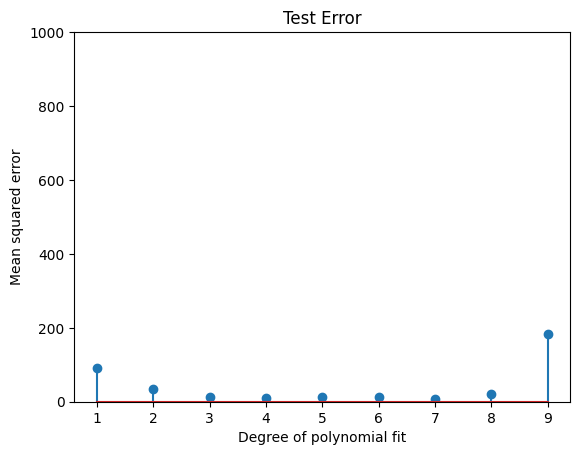

7

In [7]:

print(test_error)
plt.stem(degree, test_error)
plt.ylim([0, 1000])
plt.xlabel('Degree of polynomial fit')
plt.ylabel('Mean squared error')
plt.title('Test Error')
plt.show()
optimal_degree


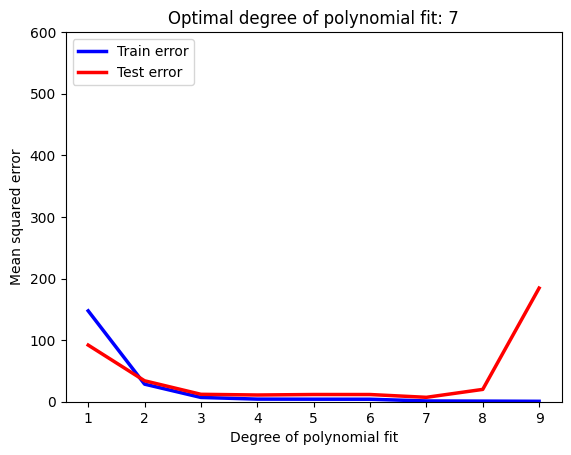

In [8]:

# Plot the train and test errors
plt.plot(degree, train_error, color='blue', linewidth=2.5, label='Train error')
plt.plot(degree, test_error, color='red', linewidth=2.5, label='Test error')
plt.legend(loc='upper left')
plt.ylim([0, 600])
plt.xlabel('Degree of polynomial fit')
plt.ylabel('Mean squared error')
plt.title('Optimal degree of polynomial fit: {}'.format(optimal_degree))
plt.show()


In [9]:

polynomial_features = PolynomialFeatures(degree=optimal_degree)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)

# Print the coefficients of the best fit line
print("Coefficients of the best fit line:")
print(model.coef_)
print("r2 score is : ", model.score(x_poly, y))

Coefficients of the best fit line:
[[ 4.18906240e+13  2.27318345e+08 -8.37940782e+05 -6.05383829e+08
   4.42316158e+06  3.37526582e+04  8.93545417e+08 -9.72342588e+06
  -1.19945839e+05  7.76663985e+04 -7.89413970e+08  1.13964433e+07
   1.80065814e+05 -3.49064535e+05  3.01702181e+04  4.17433405e+08
  -7.50949215e+06 -1.79958302e+05  6.26932084e+05 -1.08328817e+05
  -1.22148253e+03 -1.22330539e+08  2.63293934e+06  1.40578394e+05
  -5.18973952e+05  9.08406354e+04  4.59182018e+04 -1.40882802e+04
   1.53264623e+07 -3.84059059e+05 -2.88323768e+04  6.26673593e+04
   1.77321666e+05 -2.30085300e+05  1.03755011e+05 -1.68635483e+04]]
r2 score is :  0.9971891596417712
